In [1]:
import os

from cmp import main
from matplotlib import pyplot as plt

In [2]:
colors = {
    "python": "#008b8b",
    "python2": "#004b4b",
    "pypy": "#008b8b",
    "nuitka": "#7fff00",
    "cython": "#ffa500",
    "cython_with_types": "#ef9500",
    "c++": "pink",
    "java": "brown",
    "lisp": "cyan",
    "clisp": "cyan",
}

In [3]:
results = main()

{'data': [('c++', 0.005363357258353004),
          ('cython', 0.026026585163214266),
          ('cython_with_types', 0.02494919009324981),
          ('java', 0.07871563617999737),
          ('lisp', 0.011604339226909068),
          ('nuitka', 0.052041161060333255),
          ('python', 0.03402419090270996),
          ('python2', 0.015787113457918167)],
 'program': 'hello_world'}
{'data': [('c++', 0.009760352014337928),
          ('cython', 0.18672716617584229),
          ('cython_with_types', 0.1565277235848563),
          ('java', 0.0843951885516827),
          ('lisp', 0.04451289384261421),
          ('nuitka', 0.2625117897987366),
          ('python', 0.44136937459309894),
          ('python2', 0.3577264944712321)],
 'program': 'fibonacci'}


In [16]:
def plot_result(program, data):
    plt.title('program: %s' % program)
    plt.barh([d[0] for d in data], width=[d[1] for d in data], color=[colors[d[0]] for d in data], )
    plt.xlabel('seconds')
    plt.tight_layout()
    plt.savefig(os.path.join('etc/img/', '%s.png' % program))
    plt.show()

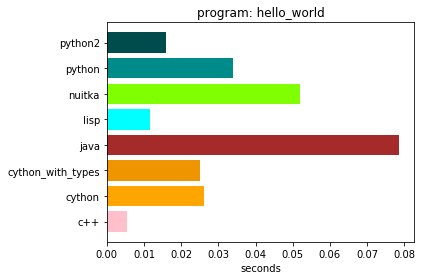

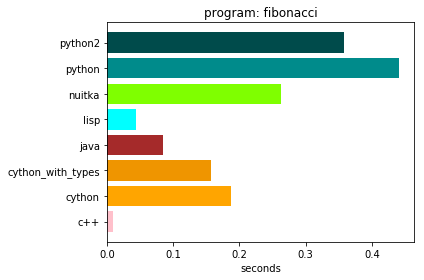

In [17]:
for result in results:
    plot_result(**result)